In [1]:
# Getting data

import requests
import pandas as pd
from datetime import datetime

response = requests.get("https://api.wazirx.com/sapi/v1/tickers/24hr");

data = response.json()
df = pd.DataFrame(data)

current_date = datetime.now().strftime("%Y%m%d")
filename = f"wazirx_data_{current_date}.csv"

df.to_csv(filename, index=False)

print("Data frame stored successfully")

Data frame stored successfully


In [2]:
#CHECKING

df.info()
#df.describe()
#df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   symbol      562 non-null    object
 1   baseAsset   562 non-null    object
 2   quoteAsset  562 non-null    object
 3   openPrice   562 non-null    object
 4   lowPrice    562 non-null    object
 5   highPrice   562 non-null    object
 6   lastPrice   562 non-null    object
 7   volume      562 non-null    object
 8   bidPrice    562 non-null    object
 9   askPrice    562 non-null    object
 10  at          562 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 48.4+ KB


In [3]:
# Transformations

df['openPrice'] = df['openPrice'].astype(float)
df['lowPrice'] = df['lowPrice'].astype(float)
df['highPrice'] = df['highPrice'].astype(float)
df['lastPrice'] = df['lastPrice'].astype(float)
df['volume'] = df['volume'].astype(float)
df['bidPrice'] = df['bidPrice'].astype(float)
df['askPrice'] = df['askPrice'].astype(float)


df.rename(columns={
    "symbol": "Symbol",
    "baseAsset": "Base Asset",
    "quoteAsset": "Quote Asset",
    "openPrice": "Open Price",
    "lowPrice": "Low Price",
    "highPrice": "High Price",
    "lastPrice": "Last Price",
    "volume": "Volume",
    "bidPrice": "Bid Price",
    "askPrice": "Ask Price",
    "at": "Timestamp"
}, inplace=True)


df['Datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')


df['Price Change'] = df['Last Price'] - df['Open Price']

df.head()

,Symbol,Base Asset,Quote Asset,Open Price,Low Price,High Price,Last Price,Volume,Bid Price,Ask Price,Timestamp,Datetime,Price Change
0,btcinr,btc,inr,5.852395e+06,5.750000e+06,5.900428e+06,5799873.000,1.70391,5799873.000,5.799998e+06,1718990804000,2024-06-21 17:26:44,-52522.0000
1,xrpinr,xrp,inr,4.430000e+01,4.358660e+01,4.459000e+01,43.655,76336.40000,43.655,4.387420e+01,1718990804000,2024-06-21 17:26:44,-0.6450
2,ethinr,eth,inr,3.204790e+05,3.107739e+05,3.204790e+05,315742.500,19.39910,315064.300,3.157425e+05,1718990804000,2024-06-21 17:26:44,-4736.5000
3,trxinr,trx,inr,1.050140e+01,1.040900e+01,1.068930e+01,10.680,325249.00000,10.680,1.068900e+01,1718990804000,2024-06-21 17:26:44,0.1786
4,eosinr,eos,inr,8.175000e+01,8.175000e+01,8.699000e+01,82.000,221.35000,82.000,8.600000e+01,1718990804000,2024-06-21 17:26:44,0.2500


In [4]:
#RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


features = ['Open Price', 'Low Price', 'High Price', 'Volume', 'Bid Price', 'Ask Price']
target = 'Last Price'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100
print(f"Accuracy (R-squared): {accuracy_percentage:.2f}%")


print("\nActual vs Predicted values:")
print(results.head()) 


Mean Squared Error: 35580333.64732526
Accuracy (R-squared): 96.09%

Actual vs Predicted values:
        Actual    Predicted
488     0.0193     0.019839
457     3.7800     4.041941
410     1.4160     1.531752
86   4512.0000  3910.645200
334    10.0000     9.532399


In [5]:
df.iloc[488]

Symbol                      gftusdt
Base Asset                      gft
Quote Asset                    usdt
Open Price                   0.0196
Low Price                    0.0191
High Price                   0.0238
Last Price                   0.0193
Volume                        365.9
Bid Price                    0.0171
Ask Price                    0.0191
Timestamp             1718990807000
Datetime        2024-06-21 17:26:47
Price Change                -0.0003
Name: 488, dtype: object

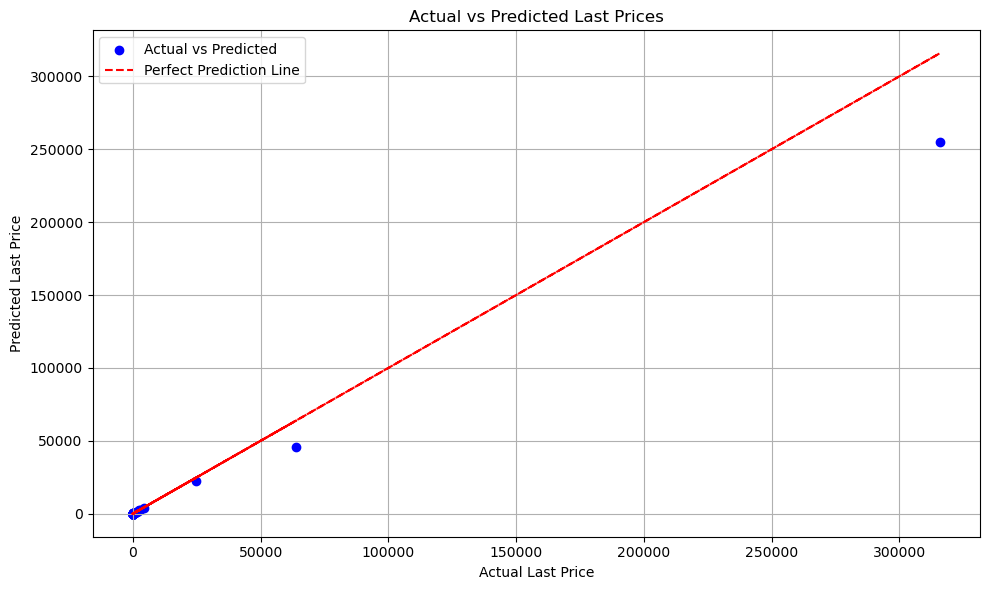

In [6]:
#Actual vs Predicted Last Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values
plt.scatter(results['Actual'], results['Predicted'], color='blue', label='Actual vs Predicted')
plt.plot(results['Actual'], results['Actual'], color='red', linestyle='--', label='Perfect Prediction Line')

plt.title('Actual vs Predicted Last Prices')
plt.xlabel('Actual Last Price')
plt.ylabel('Predicted Last Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
